In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13616361472.0 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
import pandas as pd
import numpy as np
import unicodedata  
from nltk import sent_tokenize
from nltk.corpus import stopwords
import nltk
import re
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
#from nltk import word_net
from nltk import punkt
punkt.PunktToken('this can be done')

PunktToken('this can be done', )

In [ ]:
!unzip /content/train_E52nqFa.zip -d /content/

Archive:  /content/train_E52nqFa.zip
replace /content/game_overview.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: /content/game_overview.csv  
replace /content/__MACOSX/._game_overview.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: /content/__MACOSX/._game_overview.csv  
replace /content/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip /content/test_BppAoe0.zip -d /content/

Archive:  /content/test_BppAoe0.zip
replace /content/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

In [ ]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')
game=pd.read_csv('/content/game_overview.csv')



Every title in train has a record in game_ow

In [ ]:
set(train.title) -set(game_ow.title)

NameError: ignored

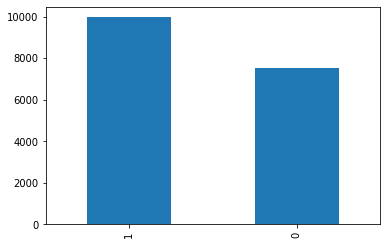

In [ ]:
train.user_suggestion.value_counts().plot(kind='bar')

No duplicates found in game_ow

In [ ]:
game_ow.loc[game_ow.duplicated('title')]

NameError: ignored

In [ ]:
game_ow.tags[0] train=pd.merge(train,game_ow,on='title',how='inner')

there is a tags column which has atleast ~250 tags for each title

In [ ]:
game_ow.tags.str.len().unique()

NameError: ignored

In [ ]:
train['year'].value_counts(normalize=True).plot(kind='bar')

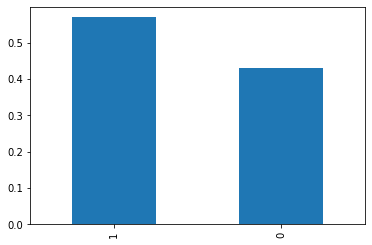

In [ ]:
train['user_suggestion'].value_counts(normalize=True).plot(kind='bar')

In [ ]:
train['user_suggestion'].value_counts()

1    9968
0    7526
Name: user_suggestion, dtype: int64

In [ ]:
train[train['user_suggestion']==0]['title'].value_counts(normalize=True).head(5)


Robocraft                 0.105501
Heroes & Generals         0.088095
War Thunder               0.079458
Bless Online              0.074542
Infestation: The New Z    0.046505
Name: title, dtype: float64

In [ ]:
train[train['user_suggestion']==1]['title'].value_counts(normalize=True).head(5)


Fractured Space      0.069021
Eternal Card Game    0.049659
Creativerse          0.044442
PlanetSide 2         0.042436
Path of Exile        0.041633
Name: title, dtype: float64

In [ ]:
mylist = []
for tag in game['tags']:
    mylist.extend(tag)

mylist = [x.lower().strip() for x in mylist]

uniquevalues = list(set(mylist))

In [ ]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        new_word = re.sub(r'(.)\1+', r'\1\1', new_word) 
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    stop_words = []
    stop_words = set(stopwords.words('english'))
    for word in words:
        if(word not in stop_words):
            new_words.append(word)
    return new_words

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [ ]:
def preprocess(text):
    # text = replace_contractions(text)
    content = nltk.word_tokenize(text)
    words = remove_non_ascii(content)
    words = to_lowercase(words)
    #words = lemmatize_verbs(words)
    words = remove_punctuation(words)
    # words = remove_stopwords(words)
    # text= ' '.join(list(dict.fromkeys(words)))
    text = ' '.join(words)
    return text

def preprocess2(text):
    # text = replace_contractions(text)    
    content = nltk.word_tokenize(text)
    words = remove_non_ascii(content)
    words = to_lowercase(words)
    words = remove_stopwords(words)
    #words = lemmatize_verbs(words)
    words = remove_punctuation(words)
    
    # text= ' '.join(list(dict.fromkeys(words)))
    text = ' '.join(words)
    return text

def join_tags(words):
    text = ''.join(words)
    return text

In [ ]:
import nltk
nltk.download('punkt')

import nltk
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
train['title'] = train['title'].apply(preprocess)
game['title'] = game['title'].apply(preprocess)
test['title'] = test['title'].apply(preprocess)

game['tags'] = game['tags'].apply(preprocess)
game['overview'] = game['overview'].apply(preprocess)

In [ ]:
train['new_user_review'] = train['user_review'].apply(preprocess2)
test['new_user_review'] = test['user_review'].apply(preprocess2)

In [ ]:
train['new_user_review'].replace({'':np.nan}, inplace=True)
train = train[~train['new_user_review'].isna()]

In [ ]:
train['new_user_review'].apply(lambda x: len(x.split()))

0         71
1         33
2         39
3         27
4         34
        ... 
17489     96
17490    145
17491    157
17492     22
17493     28
Name: new_user_review, Length: 17472, dtype: int64

In [ ]:
# to remove the reviews when the no of words is equivalent to 1
train['no_of_words'] = train['new_user_review'].apply(lambda x: len(x.split()))
test['no_of_words'] = test['new_user_review'].apply(lambda x: len(x.split()))

In [ ]:
train.year.isnull().sum()

178

In [ ]:
train['year'] = train.groupby(['title'])['year'].fillna(method='ffill').fillna(method='bfill')


In [ ]:
def plot_wordcloud(train, sent, col):
    reviews = train[train['user_suggestion']==sent][col].str.cat(sep=' ')
    #function to split text into word
    tokens = word_tokenize(reviews)
    vocabulary = set(tokens)
    frequency_dist = nltk.FreqDist(tokens)
    wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

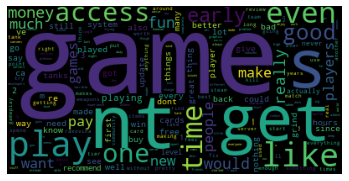

In [ ]:
plot_wordcloud(train, 0, 'new_user_review')

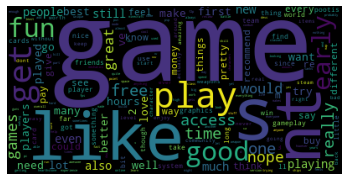

In [ ]:
plot_wordcloud(train, 1, 'new_user_review')

In [ ]:
train_df = pd.merge(train, game, left_on = ['title'], right_on= ['title'])
test_df = pd.merge(test, game, on=['title'], how='inner')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
x_train, x_valid, y_train, y_valid = train_test_split(train_df, train_df['user_suggestion'], 
                                                      random_state=0,test_size=0.15, stratify=train_df['user_suggestion'])

In [ ]:
x_train.columns

Index(['review_id', 'title', 'year', 'user_review', 'user_suggestion',
       'new_user_review', 'no_of_words', 'developer', 'publisher', 'tags',
       'overview'],
      dtype='object')

In [ ]:
probability = x_train.groupby(['title','user_suggestion']).agg({'new_user_review':'count'}).reset_index()

In [ ]:
probability['total_reviews'] = probability.groupby(['title'])['new_user_review'].transform('sum')

In [ ]:
probability.head(4)

,title,user_suggestion,new_user_review,total_reviews
0,adventurequest 3d,0,192,448
1,adventurequest 3d,1,256,448
2,black squad,0,34,249
3,black squad,1,215,249


In [ ]:
probability2=pd.pivot_table(probability, index=['title','total_reviews'], columns=['user_suggestion'], values=['new_user_review']).reset_index()

In [ ]:
probability2 = pd.pivot_table(probability, index=['title','total_reviews'], columns=['user_suggestion'], values=['new_user_review']).reset_index()

In [ ]:
probability2.columns = ['title','total_reviews','probab_rec','probab_no_rec']

In [ ]:
probability2['probab_no_rec'] = probability2['probab_no_rec']/probability2['total_reviews']
probability2['probab_rec'] = probability2['probab_rec']/probability2['total_reviews']

In [ ]:
train_df['is_train'] = 1
test_df['is_train'] = 0

In [ ]:
df = pd.concat([train_df, test_df], axis=0)

In [ ]:
df = pd.merge(df, probability2[['probab_rec','probab_no_rec','title']], on='title', how='left')


In [ ]:
probability = x_train.groupby(['user_suggestion','year']).agg({'new_user_review':'count'}).reset_index()
probability['total_review'] = probability.groupby(['year'])['new_user_review'].transform('sum')

In [ ]:
probability2 = pd.pivot_table(probability, index=['year','total_review'], values='new_user_review', columns='user_suggestion').reset_index()

In [ ]:
probability2.columns = ['year','total_reviews','year_rec','year_no_rec']

In [ ]:
probability2['year_rec'] = probability2['year_rec']/probability2['total_reviews']
probability2['year_no_rec'] = probability2['year_no_rec']/probability2['total_reviews']

In [ ]:
df = pd.merge(df, probability2[['year_rec','year_no_rec','year']], on='year',how='left')

In [ ]:
df.shape

(25517, 16)

In [ ]:
# creating the python dictionary to hold the lexicons
import collections
import csv
lexicon = collections.defaultdict(list)

# with open('new_lexicon.csv', 'r') as csvFile:
#     reader = csv.reader(csvFile)
#     for row in reader:
#         lexicon[row[0]].append(int(row[1]))
#         lexicon[row[0]].append(row[2])
# csvFile.close()   

In [ ]:
def neg_word_count(tweet):
    count = 0
    for i in tweet.split():
        #print(i)
        if i in lexicon:
            #print(i)
            try: 
                score = lexicon[i][0]
                #print('score',score)
                if score == -1:
                    count+=1            
            except: pass
    return count


#no of positive words in a tweet
def pos_word_count(tweet):
    count = 0
    for i in tweet.split():
        #print(i)
        if i in lexicon:
            #print(i)
            try: 
                score = lexicon[i][0]
                #print('score',score)
                if score == 1:
                    count+=1            
            except: pass
    return count

#overall score of the tweet
def overall_score(tweet):
    score = 0
    for i in tweet.split():
        if i in lexicon:
            try:
                a = lexicon[i][0]
                score += a
            except: 
                pass
    return score

#last token polarity
def las_pol(tweet):
    # print(tweet)
    tweet = tweet.split()
    l_word = tweet[-1]
    score = 0
    if l_word in lexicon:
        a = lexicon[l_word][0]
        #print(a)
        score = a
        #print(score)
    return score

#number of adjectives, adverbs and verbs in a tweet
def pos_POStag_count(tweet):
    count = 0
    l = ['adj','adverb','verb']
    for i in tweet.split():
        if i in lexicon:
            #print(i)
            try:
                pos_tag = lexicon[i][1]
                if pos_tag in l:
                    #print(lexicon[i])
                    if lexicon[i][0] == 1:
                        count+=1

            except: 
                pass
    return count  

#number of adjectives, adverbs and verbs in a tweet
def neg_POStag_count(tweet):
    count = 0
    l = ['adj','adverb','verb']
    for i in tweet.split():
        if i in lexicon:
            #print(i)
            try:
                pos_tag = lexicon[i][1]
                if pos_tag in l:
                    #print(lexicon[i])
                    if lexicon[i][0] == -1:
                        count+=1

            except: 
                pass
    return count 

In [ ]:
df['new_user_review'].replace({'':'good bad'}, inplace=True)

In [ ]:
df['last_word_polarity'] = df['new_user_review'].apply(las_pol)#run this after preprocessing
#number of pos tagging do after preprocessing of the tweets
df['pos_POStag_count'] = df['new_user_review'].apply(pos_POStag_count)
df['neg_POStag_count'] = df['new_user_review'].apply(neg_POStag_count)
df['neg_count'] = df['new_user_review'].apply(neg_word_count)
#number of positive word count
df['pos_count']= df['new_user_review'].apply(pos_word_count)
df['overall_score'] = df['new_user_review'].apply(overall_score)

In [ ]:
train_df = df[df['is_train']==1]
test_df = df[df['is_train']==0]


In [ ]:
from sklearn.preprocessing import LabelEncoder

class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)


In [ ]:
le = LabelEncoderExt()
le.fit(train_df['developer'])
train_df['developer'] = le.transform(train_df['developer'])
test_df['developer'] = le.transform(test_df['developer'])

<ipython-input-54-8ef964d5bd9b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['developer'] = le.transform(train_df['developer'])
<ipython-input-54-8ef964d5bd9b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['developer'] = le.transform(test_df['developer'])


In [ ]:
train_df.drop(['review_id','user_review','publisher','is_train'], axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
train_df.columns

Index(['title', 'year', 'user_suggestion', 'new_user_review', 'no_of_words',
       'developer', 'tags', 'overview', 'probab_rec', 'probab_no_rec',
       'year_rec', 'year_no_rec', 'last_word_polarity', 'pos_POStag_count',
       'neg_POStag_count', 'neg_count', 'pos_count', 'overall_score'],
      dtype='object')

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on text columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None): # fit() doesn't do anything
        return self

    def transform(self, X):   # all the work is done here
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler

review_tag = Pipeline([
                ('selector', TextSelector(key='review_tag')),
                ('tfidf', TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}',ngram_range=(1,2)))
            ])

# tags = Pipeline([
#                 ('selector', TextSelector(key='tags')),
#                 ('tfidf', TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}'))
#             ])

no_of_words =  Pipeline([
                ('selector', NumberSelector(key='no_of_words')),
                ('standard', MinMaxScaler())
            ])

year =  Pipeline([
                ('selector', NumberSelector(key='year'))
            ])
developer =  Pipeline([
                ('selector', NumberSelector(key='developer'))
            ])
title =  Pipeline([
                ('selector', NumberSelector(key='title'))
            ])

probab_rec =  Pipeline([
                ('selector', NumberSelector(key='probab_rec'))
            ])

probab_no_rec =  Pipeline([
                ('selector', NumberSelector(key='probab_no_rec'))
            ])

year_rec =  Pipeline([
                ('selector', NumberSelector(key='year_rec'))
            ])

year_no_rec =  Pipeline([
                ('selector', NumberSelector(key='year_no_rec'))
            ])

pos_POStag_count =  Pipeline([
                ('selector', NumberSelector(key='pos_POStag_count')),
                ('standard', MinMaxScaler())
            ])
neg_POStag_count =  Pipeline([
                ('selector', NumberSelector(key='neg_POStag_count')),
                ('standard', MinMaxScaler())
            ])

neg_count =  Pipeline([
                ('selector', NumberSelector(key='neg_count')),
                ('standard', MinMaxScaler())
            ])
pos_count =  Pipeline([
                ('selector', NumberSelector(key='pos_count')),
                ('standard', MinMaxScaler())
            ])
overall_score =  Pipeline([
                ('selector', NumberSelector(key='overall_score')),
                ('standard', MinMaxScaler())
            ])
last_word_polarity =  Pipeline([
                ('selector', NumberSelector(key='last_word_polarity')),
                ('standard', MinMaxScaler())
            ])

In [ ]:
from sklearn.pipeline import FeatureUnion

feats = FeatureUnion([#('review_tag', review_tag), 
                      # ('tags', tags),
                      ('no_of_words', no_of_words),
                      ('title',title),
                      ('developer',developer),
                      ('year',year),
                      ('probab_rec',probab_rec),
                      ('probab_no_rec',probab_no_rec),
                      ('year_rec',year_rec),
                      ('year_no_rec',year_no_rec),
                      ('neg_count', neg_count),
                      ('pos_count', pos_count),
                      ('overall_score', overall_score),
                      ('last_word_polarity', last_word_polarity),
                      ('pos_POStag_count', pos_POStag_count),
                      ('neg_POStag_count', neg_POStag_count)])

feature_processing = Pipeline([('feats', feats)])

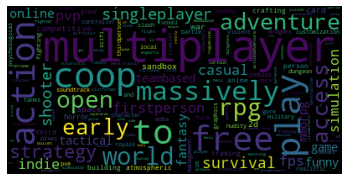

In [ ]:
plot_wordcloud(df, 1, 'tags')

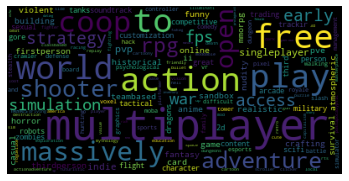

In [ ]:
plot_wordcloud(df, 0, 'tags')

In [ ]:
train_df2 = train_df[(train_df['no_of_words']>1)]

In [ ]:
train_df2['review_tag'] = train_df2['new_user_review']+train_df2['tags']
test_df['review_tag']= test_df['new_user_review']+test_df['tags']

train_df2.review_tag=train_df2.review_tag.astype(str)
test_df.review_tag=test_df.review_tag.astype(str)

<ipython-input-61-93ec5ddc571b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df2['review_tag'] = train_df2['new_user_review']+train_df2['tags']
<ipython-input-61-93ec5ddc571b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['review_tag']= test_df['new_user_review']+test_df['tags']
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [ ]:
p=TfidfVectorizer()
q=p.fit_transform(train_df2.review_tag)
df1 = pd.DataFrame(q.toarray(), columns=p.get_feature_names())
print(df1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
x_train, x_valid, y_train, y_valid = train_test_split(train_df2, train_df2['user_suggestion'], 
                                                      random_state=0,test_size=0.15, stratify=train_df2['user_suggestion'])

In [ ]:
x_train = x_train.fillna(0)
x_valid = x_valid.fillna(0)

In [ ]:
feature_processing.fit_transform(x_train) 
feature_processing.transform(x_valid) 
feature_processing.transform(test_df) 

array([[0.023779724655819776, 'counterstrike global offensive', 37, ...,
        0.0, 0.0, 0.0],
       [0.05694618272841052, 'counterstrike global offensive', 37, ...,
        0.0, 0.0, 0.0],
       [0.1821026282853567, 'counterstrike global offensive', 37, ...,
        0.0, 0.0, 0.0],
       ...,
       [0.023779724655819776, 'guns up', 37, ..., 0.0, 0.0, 0.0],
       [0.04380475594493117, 'guns up', 37, ..., 0.0, 0.0, 0.0],
       [0.011264080100125156, 'guns up', 37, ..., 0.0, 0.0, 0.0]],
      dtype=object)

In [ ]:
l = feature_processing.fit_transform(x_train)

NameError: ignored

In [ ]:
l.shape

In [ ]:
from collections import Counter
Counter(y_train)

In [ ]:
import numpy as np
from sklearn import svm
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('features',feats),
    ('classifier', xgb.XGBClassifier(objective='binary:logistic')),
    # ('classifier', RandomForestClassifier())
])


In [ ]:
x_train.review_tag

NameError: ignored

In [ ]:
!pip install bert_serving
!pip install bert_serving_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/commands/install.py", line 318, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 127, in resolve
    result = self._result = resolver.resolve(
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 473, in resolve
    stat

In [ ]:
#@title
from bert_serving.client import BertClient

# make a connection with the BERT server using it's ip address
bc = BertClient()
# get the embedding for train and val sets

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

count_vec = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,1))

In [ ]:
!pip install bert-for-tf2
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 163 kB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30534 sha256=8b4d6825245833cd32f3cc0eeda226c89717b9fb32dcc98b722034b3d76aeb65
  Stored in directory: /root/.cache/pip/wheels/ab/a4/72/df07592cea3ae06b5e846f5e52262f8b16748e829ca354b7df
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19472 sha256=f3b9f65c96867822ba164154ff1c6c702e9282fd1d7855ad8c2519ec72733a59
  Stored in directory: /root/.cache/pip/wheels/c7/f3/85/b8cf1d8bfe55dc2ece0f1fcd4e91d6f8fc7b59ff3fd75329e1
  Created wheel for py-params: filename=py_params-0.10.2-py3-none-any.whl size=7911 sha256=017638c8b6b364e3a6beae5e93e65eab87597bf9428ed410a1c217843c9c8a93
  Stored in directory: /root/.cache/pip/wheels/ac/26/e9/df16869ccbd4abf517f1ff3be9a2c7ee5c5980fc87eea04fb1
Successfully built bert-for-tf2 params-flow p

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import bert
from tensorflow.keras.models import  Model
from tqdm import tqdm
import numpy as np
from collections import namedtuple

In [ ]:
bert_layer=hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/1",trainable=True)

In [ ]:
# input token ids is tokenizer converts tokens using vocab file.
# input masks are either 0 or 1. 1 for useful tokens, 0 for padding.
# segment ids are either 0 or 1. For 2 text training: 0 for the first one, 1 for the second one.

# MAx sequence length is choosen as 128 based on the available text length in user review

In [ ]:
MAX_SEQ_LEN=128
input_word_ids = tf.keras.layers.Input(shape=(MAX_SEQ_LEN,), dtype=tf.int32,
                                       name="input_word_ids")
input_mask = tf.keras.layers.Input(shape=(MAX_SEQ_LEN,), dtype=tf.int32,
                                   name="input_mask")
segment_ids = tf.keras.layers.Input(shape=(MAX_SEQ_LEN,), dtype=tf.int32,
                                    name="segment_ids")

In [ ]:
def get_masks(tokens, max_seq_length):
    return [1]*len(tokens) + [0] * (max_seq_length - len(tokens))
 
def get_segments(tokens, max_seq_length):
    """Segments: 0 for the first sequence, 1 for the second"""
    segments = []
    current_segment_id = 0
    for token in tokens:
        segments.append(current_segment_id)
        if token == "[SEP]":
            current_segment_id = 1
    return segments + [0] * (max_seq_length - len(tokens))

In [ ]:
# max_seq_length= 128
# tokens= [['ravi','lakshmi','hmm','hol','SEP'],['ravidf','laefkshmi','hsefmm','hohfl',['SEP']]]
# segments = []
# current_segment_id = 0
# for token in tokens:
#     segments.append(current_segment_id)
#     if token == "[SEP]":
#         current_segment_id = 1
# print( segments + [0] * (max_seq_length - len(tokens)))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])

In [ ]:
segment_ids

<KerasTensor: shape=(None, 128) dtype=int32 (created by layer 'segment_ids')>

In [ ]:
pooled_output

<KerasTensor: shape=(None, 1024) dtype=float32 (created by layer 'keras_layer')>

In [ ]:
sequence_output

<KerasTensor: shape=(None, 128, 1024) dtype=float32 (created by layer 'keras_layer')>

In [ ]:
FullTokenizer=bert.bert_tokenization.FullTokenizer
 
vocab_file=bert_layer.resolved_object.vocab_file.asset_path.numpy()
 
do_lower_case=bert_layer.resolved_object.do_lower_case.numpy()
 
tokenizer=FullTokenizer(vocab_file,do_lower_case)
 
def get_ids(tokens, tokenizer, max_seq_length):
    """Token ids from Tokenizer vocab"""
    token_ids = tokenizer.convert_tokens_to_ids(tokens,)
    input_ids = token_ids + [0] * (max_seq_length-len(token_ids))
    return input_ids

In [ ]:
def create_single_input(sentence,MAX_LEN):
  
  stokens = tokenizer.tokenize(sentence)
  
  stokens = stokens[:MAX_LEN]
  
  stokens = ["[CLS]"] + stokens + ["[SEP]"]
 
  ids = get_ids(stokens, tokenizer, MAX_SEQ_LEN)
  masks = get_masks(stokens, MAX_SEQ_LEN)
  segments = get_segments(stokens, MAX_SEQ_LEN)

  return ids,masks,segments

def create_input_array(sentences):

  input_ids, input_masks, input_segments = [], [], []

  for sentence in tqdm(sentences,position=0, leave=True):
  
    ids,masks,segments=create_single_input(sentence,MAX_SEQ_LEN-2)

    input_ids.append(ids)
    input_masks.append(masks)
    input_segments.append(segments)

  return [np.asarray(input_ids, dtype=np.int32), 
            np.asarray(input_masks, dtype=np.int32), 
            np.asarray(input_segments, dtype=np.int32)]


In [ ]:
x = tf.keras.layers.Dense(256, activation='relu')(sequence_output)
x = tf.keras.layers.Dropout(0.2)(x)
out = tf.keras.layers.Dense(1, activation="sigmoid", name="dense_output")(x)
 
model = tf.keras.models.Model(
      inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
 
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
train_sentences = np.array(x_train['new_user_review'])
inputs=create_input_array(train_sentences)

100%|██████████| 14833/14833 [00:26<00:00, 560.46it/s]


In [ ]:
inputs[0].shape

(14833, 128)

In [ ]:
train_sentences[0]

'thought would different mobile version well m dissapointed already hate mobile version cause s play real yugioh 2 field spell card time 3 space card zone wtf dude m sorry dislikedisyugioh play love yugioh game wow good dueling trading levelup systems unecessary 1st gen cards like lvl5 17001100 normal monster make game even beautiful'

In [ ]:
# sentence=train_sentences[0]
# MAX_LEN=len(train_sentences[0])-2
# stokens = tokenizer.tokenize(sentence)
  
# stokens = stokens[:MAX_LEN]

# stokens = ["[CLS]"] + stokens + ["[SEP]"]
# tokenizer=FullTokenizer(vocab_file,do_lower_case)


# get_ids(stokens, tokenizer, len(train_sentences[0])-2)
# get_masks(stokens, MAX_SEQ_LEN)

# r=get_segments(stokens, MAX_SEQ_LEN) 

In [ ]:
valid_sentences = np.array(x_valid['new_user_review'])
val_inputs=create_input_array(valid_sentences)

100%|██████████| 2618/2618 [00:05<00:00, 470.97it/s]


In [ ]:
model.fit(inputs,y_train,epochs=2,batch_size=6,validation_data=(val_inputs, y_valid),shuffle=True)

Epoch 1/2
2427/2473 [============================>.] - ETA: 23:27 - loss: 0.7087 - accuracy: 0.5635